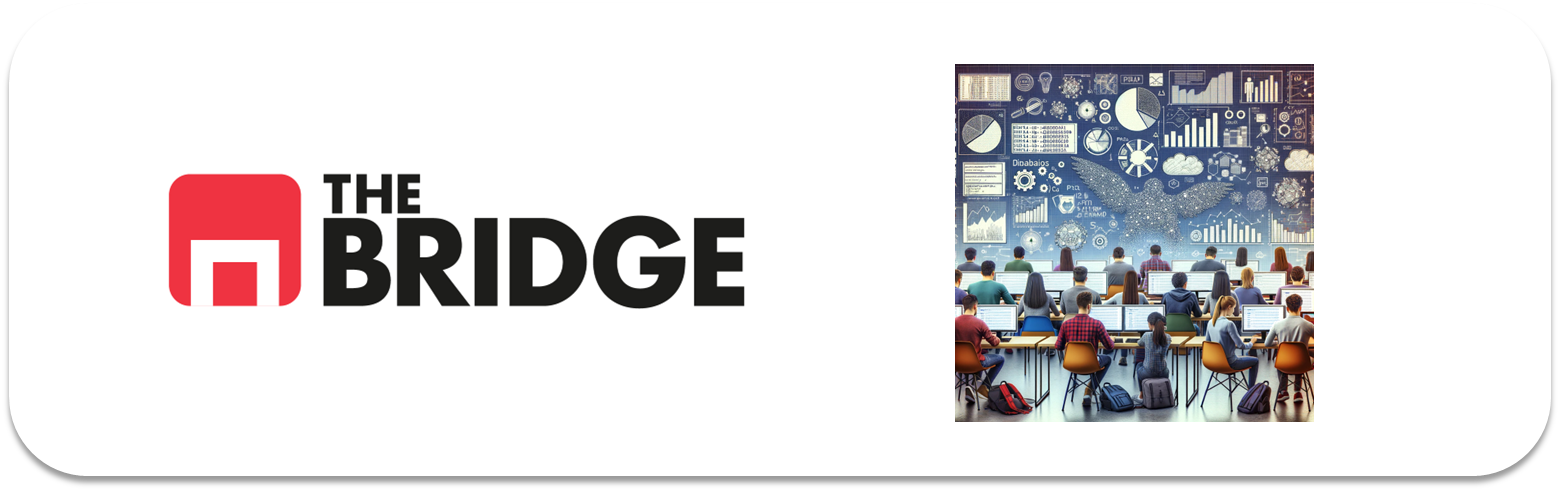

## PRACTICA OBLIGATORIA: **Estadistica Inferencial y Probabilidad**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## #1 Titanic

Carga el dataset del titanic, y contesta a las siguientes preguntas:

1. ¿Cuál es la probabilidad de superviviencia de un niño?
2. ¿Cuál es la probabilidad de que una mujer viajase sola?
3. ¿Cuál es la probabilidad de sobreviviese un hombre entre 30 y 40 años que embarcó en Southampton y no tuvo que pagar billete?
4. ¿Y si hubiera acompañado de 2 familiares?
5. Si consideramos ahora que queremos tener cierta confianza estadística en nuestras probabilidades (ten en cuenta que estamos extrapolando los ratios de una muestra), ¿cuál sería el rango de probabilidades de sobrevivir de una persona que viajase sola al 95%?
6. EXTRA: ¿Y si además el pasajero de 5 fuera un pasajero de tercera o de segunda?

In [3]:
df = sns.load_dataset('titanic')

Probabilidad de supervivencia de un niño: 59.04%


C:\Users\danma\AppData\Local\Temp\ipykernel_22112\3867916923.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='survived', y='survived', data=ninos,


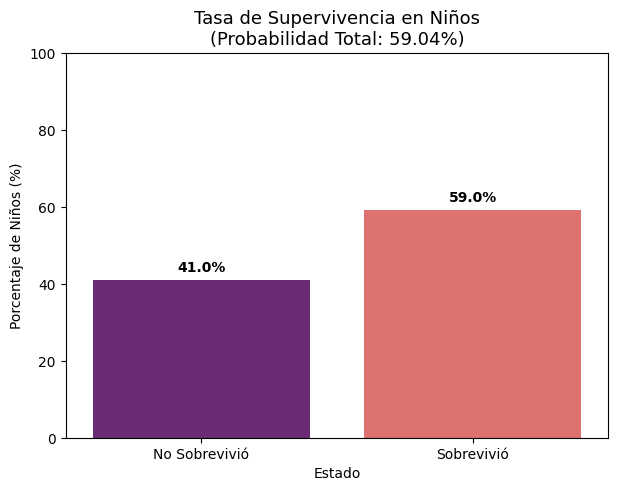

In [ ]:
ninos = df[df['age'] < 16]
prob_supervivencia_nino = ninos['survived'].mean()
print(f"Probabilidad de supervivencia de un niño: {prob_supervivencia_nino:.2%}")

plt.figure(figsize=(7, 5))

ax = sns.barplot(x='survived', y='survived', data=ninos, 
                 estimator=lambda x: len(x) / len(ninos) * 100, 
                 palette='magma')

plt.title(f'Tasa de Supervivencia en Niños\n(Probabilidad Total: {prob_supervivencia_nino:.2%})', fontsize=13)
plt.xlabel('Estado')
plt.ylabel('Porcentaje de Niños (%)')
plt.xticks([0, 1], ['No Sobrevivió', 'Sobrevivió'])
plt.ylim(0, 100)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontweight='bold')

plt.show()

Probabilidad de que una mujer viajase sola: 40.13%


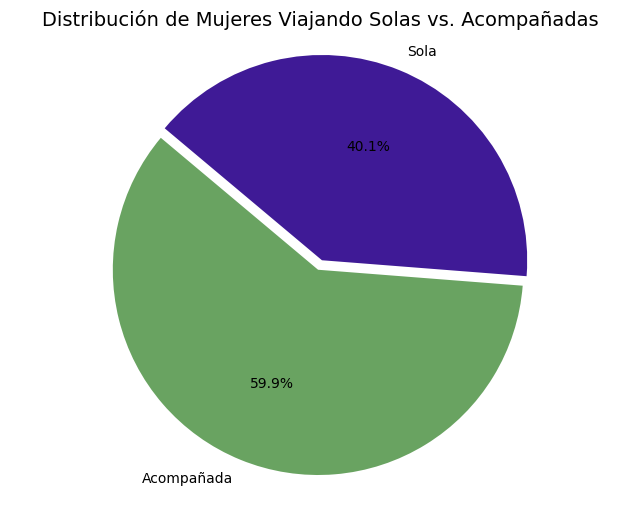

In [ ]:
mujeres = df[df['sex'] == 'female']
prob_mujer_sola = mujeres['alone'].mean()
print(f"Probabilidad de que una mujer viajase sola: {prob_mujer_sola:.2%}")

conteos = mujeres['alone'].value_counts().sort_index() 

labels = ['Acompañada', 'Sola']
sizes = conteos.values
colors = ["#69a361", "#3f1a96"]
explode = (0.05, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=False, startangle=140)

plt.title('Distribución de Mujeres Viajando Solas vs. Acompañadas', fontsize=14)
plt.axis('equal') 

plt.show()

Probabilidad de supervivencia (Caso 3): 0.00%


C:\Users\danma\AppData\Local\Temp\ipykernel_22112\1572281930.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette=['skyblue', 'salmon'], edgecolor='black')


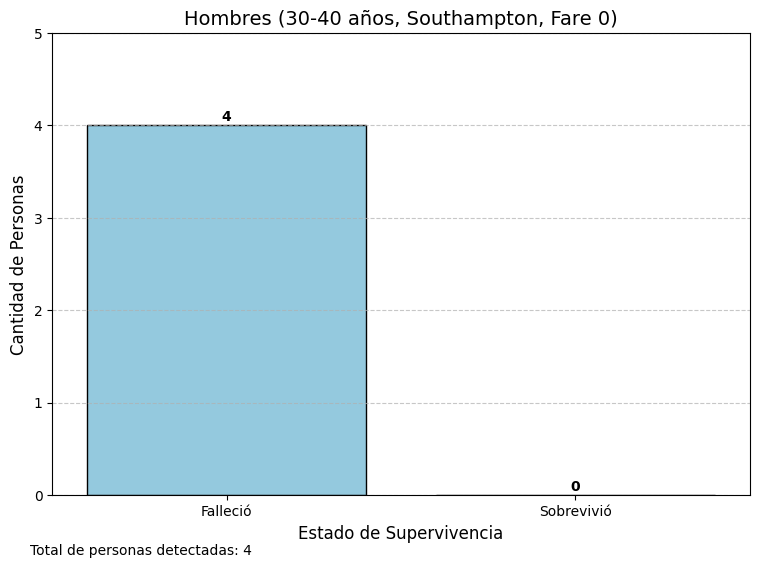

In [ ]:
filtro_3 = (
    (df['sex'] == 'male') & 
    (df['age'] >= 30) & (df['age'] <= 40) & 
    (df['embark_town'] == 'Southampton') & 
    (df['fare'] == 0)
)
hombres_gratis = df[filtro_3]
prob_hombres_gratis = hombres_gratis['survived'].mean()
total_personas = len(hombres_gratis)

print(f"Probabilidad de supervivencia (Caso 3): {prob_hombres_gratis:.2%}")

plt.figure(figsize=(9, 6))

counts = hombres_gratis['survived'].value_counts().reindex([0, 1], fill_value=0)

ax = sns.barplot(x=counts.index, y=counts.values, palette=['skyblue', 'salmon'], edgecolor='black')

plt.title('Hombres (30-40 años, Southampton, Fare 0)', fontsize=14)
plt.xlabel('Estado de Supervivencia', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.xticks([0, 1], ['Falleció', 'Sobrevivió'])
plt.yticks(range(int(counts.max()) + 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(counts.values):
    ax.text(i, v + 0.05, str(int(v)), color='black', fontweight='bold', ha='center')

plt.figtext(0.1, 0.01, f"Total de personas detectadas: {total_personas}", fontsize=10)

plt.show()

Probabilidad de supervivencia (Caso 4): nan%


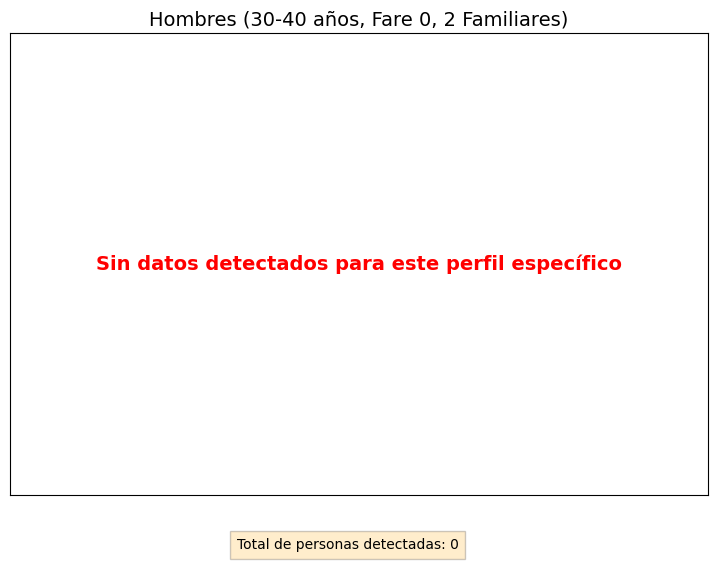

In [ ]:
filtro_4 = (
    (df['sex'] == 'male') & 
    (df['age'] >= 30) & (df['age'] <= 40) & 
    (df['embark_town'] == 'Southampton') & 
    (df['fare'] == 0) &
    ((df['sibsp'] + df['parch']) == 2)
)
acompanados = df[filtro_4]
prob_acompanados = acompanados['survived'].mean()
total_detectados = len(acompanados)

print(f"Probabilidad de supervivencia (Caso 4): {prob_acompanados:.2%}")

plt.figure(figsize=(9, 6))

if total_detectados == 0:
    plt.text(0.5, 0.5, 'Sin datos detectados para este perfil específico', 
             ha='center', va='center', fontsize=14, color='red', fontweight='bold')
    plt.title('Hombres (30-40 años, Fare 0, 2 Familiares)', fontsize=14)
    plt.xticks([])
    plt.yticks([])
else:
    counts = acompanados['survived'].value_counts().reindex([0, 1], fill_value=0)
    ax = sns.barplot(x=counts.index, y=counts.values, palette=['#5D3FD3', '#FF6F61'], edgecolor='black')
    plt.title('Hombres (30-40 años, Fare 0, 2 Familiares)', fontsize=14)
    plt.xticks([0, 1], ['Falleció', 'Sobrevivió'])
    plt.ylabel('Cantidad de Personas')
    
    for i, v in enumerate(counts.values):
        plt.text(i, v + 0.1, str(int(v)), ha='center', fontweight='bold')

plt.figtext(0.5, 0.02, f"Total de personas detectadas: {total_detectados}", ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Rango de supervivencia (viajeros solos) al 95%: [26.47%, 34.24%]


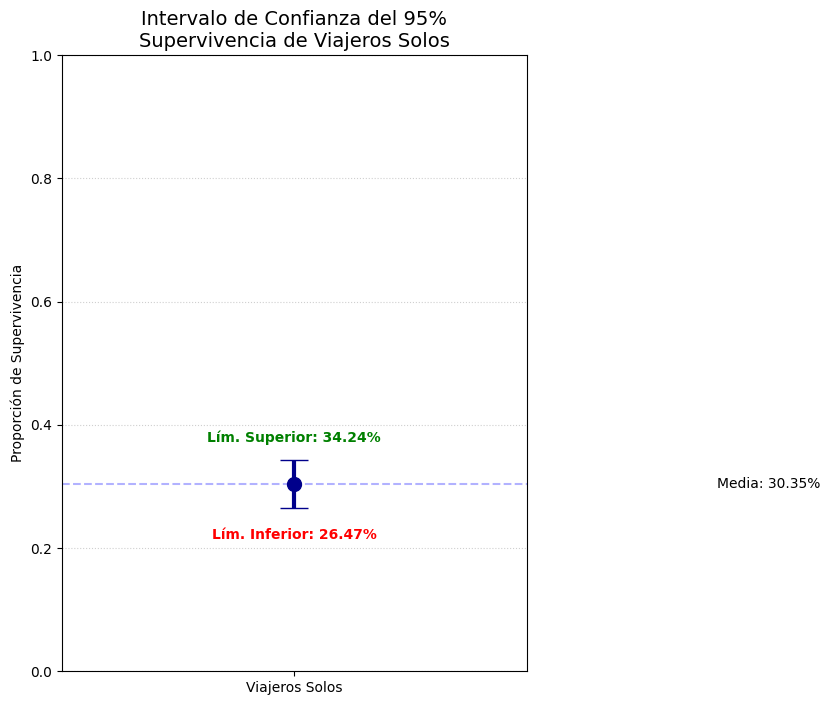

In [ ]:
viajeros_solos = df[df['alone'] == True]
n = len(viajeros_solos)
p_hat = viajeros_solos['survived'].mean()

confianza = 0.95
se = np.sqrt((p_hat * (1 - p_hat)) / n)
z = stats.norm.ppf(1 - (1 - confianza) / 2)

inferior = p_hat - z * se
superior = p_hat + z * se

print(f"Rango de supervivencia (viajeros solos) al 95%: [{inferior:.2%}, {superior:.2%}]")

plt.figure(figsize=(6, 8))

plt.errorbar(x=['Viajeros Solos'], y=[p_hat], 
             yerr=[[p_hat - inferior], [superior - p_hat]], 
             fmt='o', markersize=10, capsize=10, color='darkblue', linewidth=3, label='IC 95%')

plt.ylim(0, 1)
plt.axhline(y=p_hat, color='blue', linestyle='--', alpha=0.3)
plt.title('Intervalo de Confianza del 95%\nSupervivencia de Viajeros Solos', fontsize=14)
plt.ylabel('Proporción de Supervivencia')
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.text(0, inferior - 0.05, f'Lím. Inferior: {inferior:.2%}', ha='center', color='red', fontweight='bold')
plt.text(0, superior + 0.03, f'Lím. Superior: {superior:.2%}', ha='center', color='green', fontweight='bold')
plt.text(0.1, p_hat, f'Media: {p_hat:.2%}', va='center')

plt.show()

## #2 Life Satisfaction

Carga el dataset de satifacción vital y contesta a las siguietnes preguntas:

1. ¿Podemos asegurar con cierta confianza estadística (del 99%) que la satisfaccion vital media del mundo es menor de 7?
2. ¿Qué nivel de satisfacción media asignaríamos a país con esperanza de vida de más de 65 años y tasa de empleo superior a 60%? (ojo fijate que son umbrales)
3. ¿Cuál sería la probabilidad de tener más de 6 puntos de satisfacción vital para los países con esperanza de vida mayor a 65 años y tasa de empleo superior a 60%?


In [12]:
df_life = pd.read_csv('./data/lifesat_full.csv')
df_life.columns = df_life.columns.str.strip()

Media observada: 6.60
P-valor: 0.0020


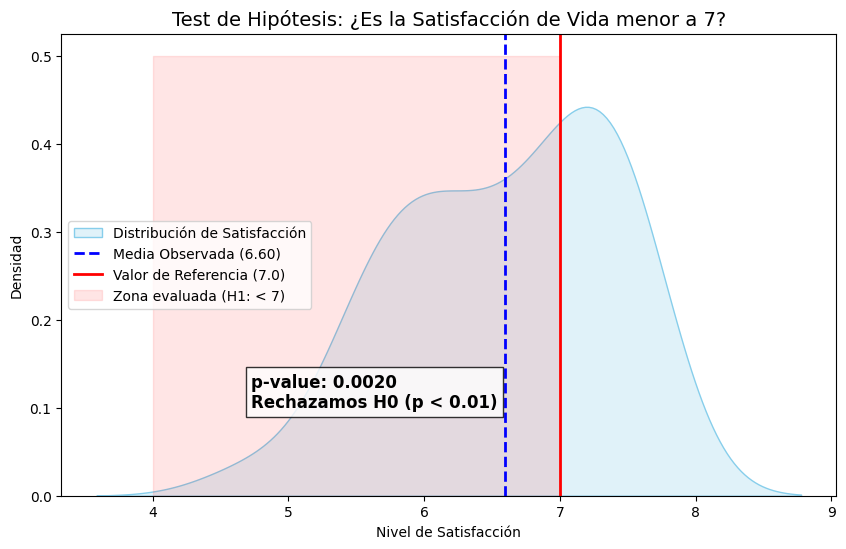

In [13]:
satisfaccion = df_life['Life satisfaction'].dropna()
media_obs = satisfaccion.mean()
t_stat, p_value = stats.ttest_1samp(satisfaccion, 7, alternative='less')

print(f"Media observada: {media_obs:.2f}")
print(f"P-valor: {p_value:.4f}")

plt.figure(figsize=(10, 6))

sns.kdeplot(satisfaccion, fill=True, color="skyblue", label="Distribución de Satisfacción")

plt.axvline(media_obs, color='blue', linestyle='--', linewidth=2, label=f'Media Observada ({media_obs:.2f})')

plt.axvline(7, color='red', linestyle='-', linewidth=2, label='Valor de Referencia (7.0)')

plt.fill_betweenx([0, 0.5], 4, 7, color='red', alpha=0.1, label='Zona evaluada (H1: < 7)')

plt.title('Test de Hipótesis: ¿Es la Satisfacción de Vida menor a 7?', fontsize=14)
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Densidad')
plt.legend()

resultado_texto = "Rechazamos H0 (p < 0.01)" if p_value < 0.01 else "No rechazamos H0"
plt.text(satisfaccion.min(), 0.1, f'p-value: {p_value:.4f}\n{resultado_texto}', 
         bbox=dict(facecolor='white', alpha=0.8), fontsize=12, fontweight='bold')

plt.show()

La satisfacción media para este grupo es: 6.75


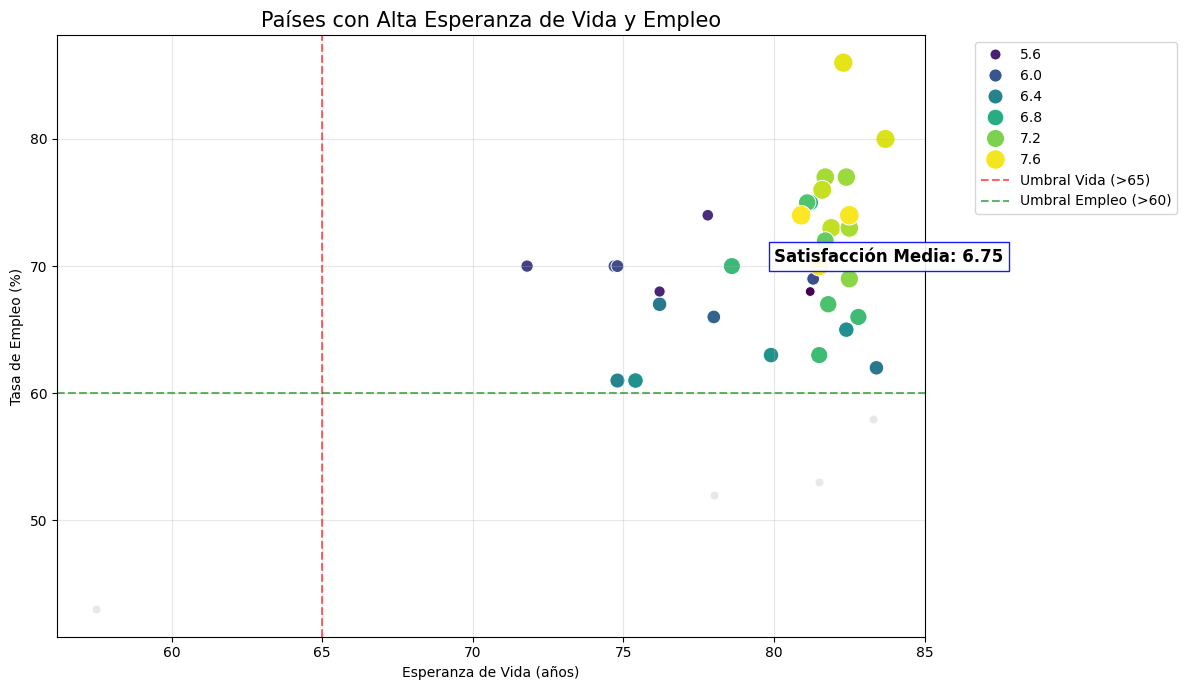

In [15]:
filtro_umbrales = (df_life['Life expectancy'] > 65) & (df_life['Employment rate'] > 60)
paises_seleccionados = df_life[filtro_umbrales]
satisfaccion_media_grupo = paises_seleccionados['Life satisfaction'].mean()

print(f"La satisfacción media para este grupo es: {satisfaccion_media_grupo:.2f}")

plt.figure(figsize=(12, 7))

sns.scatterplot(data=df_life, x='Life expectancy', y='Employment rate', 
                color='lightgrey', alpha=0.5)

sns.scatterplot(data=paises_seleccionados, x='Life expectancy', y='Employment rate', 
                hue='Life satisfaction', size='Life satisfaction', 
                palette='viridis', sizes=(50, 200))

plt.axvline(65, color='red', linestyle='--', alpha=0.6, label='Umbral Vida (>65)')
plt.axhline(60, color='green', linestyle='--', alpha=0.6, label='Umbral Empleo (>60)')

plt.title('Países con Alta Esperanza de Vida y Empleo', fontsize=15)
plt.xlabel('Esperanza de Vida (años)')
plt.ylabel('Tasa de Empleo (%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.text(paises_seleccionados['Life expectancy'].mean(), 
         paises_seleccionados['Employment rate'].mean(), 
         f'Satisfacción Media: {satisfaccion_media_grupo:.2f}', 
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='blue'),
         fontsize=12, fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Probabilidad de satisfacción > 6 en este grupo: 78.12%


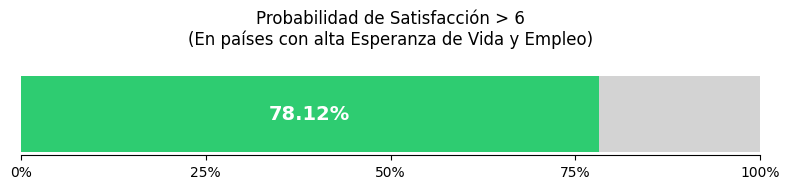

In [16]:
exito = paises_seleccionados[paises_seleccionados['Life satisfaction'] > 6]
probabilidad = len(exito) / len(paises_seleccionados)
print(f"Probabilidad de satisfacción > 6 en este grupo: {probabilidad:.2%}")

fig, ax = plt.subplots(figsize=(8, 2))

ax.barh(0, 1, color='lightgrey', height=0.5)

ax.barh(0, probabilidad, color='#2ecc71', height=0.5)

ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

plt.text(probabilidad/2, 0, f'{probabilidad:.2%}', 
         va='center', ha='center', color='white', fontweight='bold', fontsize=14)

plt.title('Probabilidad de Satisfacción > 6\n(En países con alta Esperanza de Vida y Empleo)', fontsize=12, pad=20)

for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

## EXTRA: La contrainituividad de la probabilidad

Para poder lidiar con la incertidumbre que nos rodea, **solemos aplicar lo que llamamos nuestro "*sentido común*"**. Por ejemplo, si al levantarnos por la mañana vemos que el día se encuentra nublado, este hecho no nos da la **certeza** de que comenzará a llover más tarde; sin embargo, nuestro *sentido común* puede inducirnos a cambiar nuestros planes y a actuar como si *creyéramos* que fuera a llover si las nubes son los suficientemente oscuras o si escuchamos truenos, ya que nuestra experiencia nos dice que estos signos indicarían una mayor *posibilidad* de que el hecho de que fuera a llover más tarde realmente ocurra. 
Nuestro *sentido común* es algo tan arraigado en nuestro pensamiento, que lo utilizamos automáticamente sin siquiera ponernos a pensar en ello; pero muchas veces, el *sentido común* también nos puede jugar una mala pasada y hacernos elegir una respuesta incorrecta.


#### Situación 1 - La coincidencia de cumpleaños
Vamos a una fiesta a la que concurren un total de 50 personas. Allí un amigo nos desafía afirmando que en la fiesta debe haber por lo menos 2 personas que cumplen años el mismo día y nos apuesta 100 euros a que está en lo correcto. Es decir, que si él acierta deberíamos pagarle los 100 euros; o en caso contrario, el nos pagará los 100 euros. ¿Deberíamos aceptar la apuesta? 


#### Situación 2 - ¿Que puerta elegir? (El dilema de Monty Hall)
Estamos participando en un concurso en el cual se nos ofrece la posibilidad de elegir una entre tres puertas. Tras una de ellas se encuentra una ferrari ultimo modelo, y detrás de las otras dos hay una cabra; luego de elegir una puerta, el presentador del concurso abre una de las puertas restantes y muestra que hay una cabra (el presentador sabe que hay detrás de cada puerta). Luego de hacer esto, el presentador nos ofrece la posibilidad de cambiar nuestra elección inicial y quedarnos con la otra puerta que no habíamos elegido inicialmente. ¿Deberíamos cambiar o confiar en nuestra elección inicial?

¿Qué te diría su *sentido común* que deberían hacer en cada una de estas situaciones?